<a href="https://colab.research.google.com/github/amiripouria/AI4032/blob/main/AI4032_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2

## Part 1: CWRU Dataset

### A. Loading Data

In [43]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [44]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1-2y29UPCo_325hn4n2z3M2J2i04nOKaA
mat_data = scipy.io.loadmat('IR014_1.mat')
mat_data

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1-2y29UPCo_325hn4n2z3M2J2i04nOKaA

but Gdown can't. Please check connections and permissions.


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 13:42:08 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X176_DE_time': array([[0.16568133],
        [0.116436  ],
        [0.0626    ],
        ...,
        [0.06927733],
        [0.03964667],
        [0.00626   ]]),
 'X176_FE_time': array([[0.12327273],
        [0.15470727],
        [0.12758727],
        ...,
        [0.12717636],
        [0.14443455],
        [0.16148727]]),
 'X176RPM': array([[1751]], dtype=uint16)}

### B. Plotting Signal

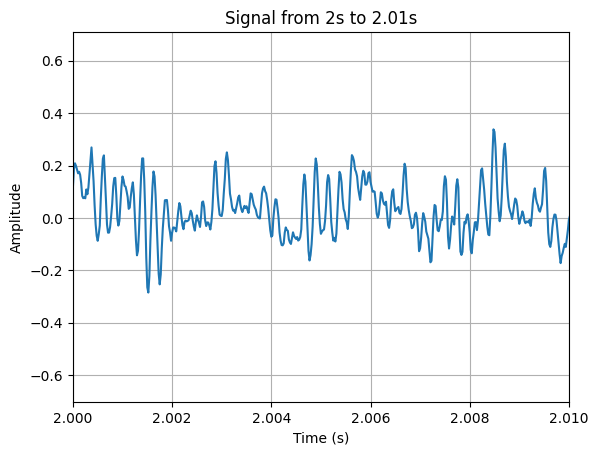

In [45]:
df = pd.DataFrame(mat_data['X176_FE_time'])
sampling_rate = 48000
time = x / sampling_rate
y = df

plt.plot(time, y)
plt.xlim(2, 2.01)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal from 2s to 2.01s")
plt.grid(True)
plt.show()

### C. Frequency Analysis

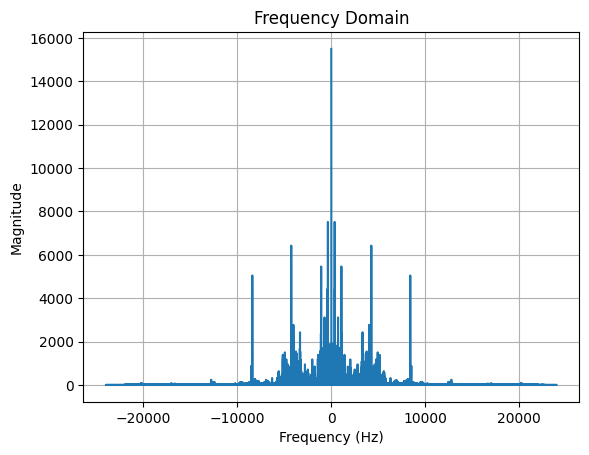

In [46]:
from scipy.fft import fft, fftfreq

def plot_fft(signal, sampling_rate):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)

    plt.plot(xf, np.abs(yf))
    plt.title("Frequency Domain")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

# Extract the signal from the DataFrame
signal = df.values.flatten()

# Plot the FFT of the signal
plot_fft(signal, sampling_rate)

### D. Segment Signal

In [47]:
# Reshape the signal into 128 pieces
num_pieces = 128

# Trim the signal to a length that is divisible by 128
divisible_length = (len(signal) // num_pieces) * num_pieces
trimmed_signal = signal[:divisible_length]

# Reshape the trimmed signal
piece_length = len(trimmed_signal) // num_pieces
segmented_signal = trimmed_signal.reshape(num_pieces, piece_length)
print("Segmented signal shape:", segmented_signal.shape)

Segmented signal shape: (128, 3812)


### E. Continue segmenting signal

In [48]:
segmented_df = pd.DataFrame(segmented_signal)
display(segmented_df)

,0,1,2,3,4,5,6,7,8,9,...,3802,3803,3804,3805,3806,3807,3808,3809,3810,3811
0,0.123273,0.154707,0.127587,0.093482,0.045816,0.000000,-0.050336,-0.094920,-0.102111,-0.041091,...,0.006985,-0.011711,-0.051364,-0.083004,-0.052802,-0.048898,-0.020545,-0.062869,-0.114233,-0.132107
1,-0.110740,-0.053007,-0.043351,-0.010684,0.008013,0.062047,0.117931,0.128820,0.110945,0.015820,...,-0.031845,0.020340,0.057116,0.049104,0.042324,0.001233,-0.006985,-0.009862,-0.035338,-0.028969
2,-0.057116,-0.055473,-0.026504,0.022395,0.070471,0.078689,0.095536,0.091427,0.103138,0.092044,...,-0.026298,-0.010273,0.058760,0.147105,0.223329,0.224151,0.149365,0.078895,-0.006369,-0.045405
3,-0.068827,-0.111973,-0.125533,-0.104576,-0.038831,0.051775,0.107864,0.116287,0.105398,0.094098,...,0.039653,0.137038,0.147722,0.084236,-0.002260,-0.089989,-0.118136,-0.128409,-0.127793,-0.106015
4,-0.049720,0.027325,0.088756,0.107247,0.090400,0.044173,-0.010273,-0.026298,-0.055473,-0.066156,...,-0.059376,-0.030202,0.018491,0.062869,0.061431,0.028764,0.024449,0.057527,0.083209,0.090605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.009451,0.024655,0.042940,0.041707,0.060815,0.028558,-0.004931,-0.016642,-0.030407,0.016231,...,-0.016642,-0.006164,0.013560,0.091838,0.175253,0.246545,0.266680,0.179362,0.095125,0.028558
124,-0.021778,-0.006369,0.020751,0.051775,0.073142,0.104165,0.145256,0.173404,0.158611,0.091633,...,-0.089578,-0.015615,0.056500,0.089167,0.107658,0.109302,0.091222,0.060815,0.023627,-0.010273
125,-0.008424,-0.013149,-0.024244,-0.049104,-0.096769,-0.088756,-0.029996,0.059376,0.155118,0.216138,...,0.071498,0.059787,0.059376,0.043351,0.047871,0.014793,0.054035,0.104165,0.144024,0.138065
126,0.077662,0.012122,-0.033900,-0.032051,-0.024655,-0.003082,0.003904,0.018696,0.034311,0.009451,...,0.133340,0.147722,0.124711,0.093893,0.068622,0.018696,-0.041913,-0.102522,-0.104782,-0.039653


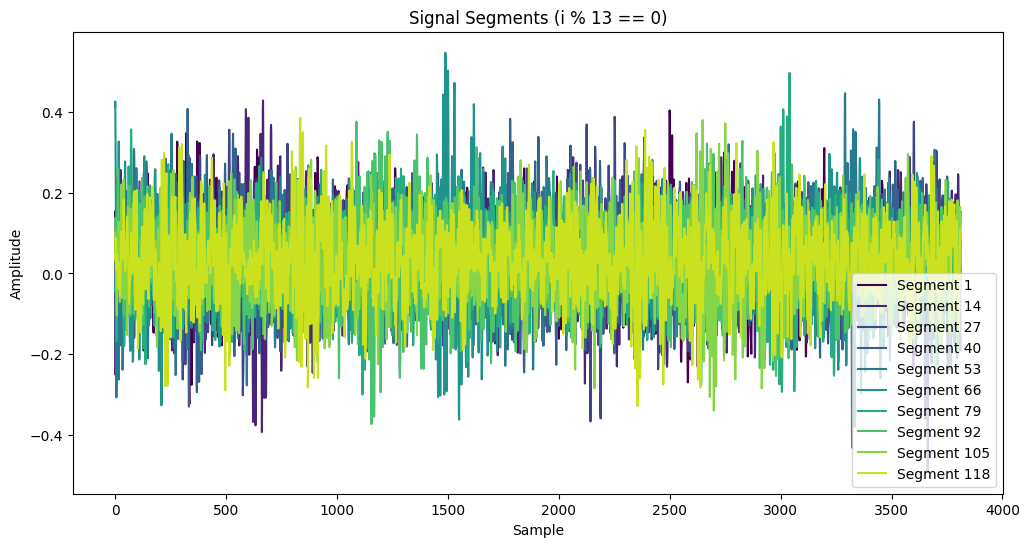

In [49]:
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(segmented_df)))

for i, row in segmented_df.iterrows():
    if i % 13 == 0:
        plt.plot(row, color=colors[i], label=f'Segment {i+1}')

plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Signal Segments (i % 13 == 0)")
plt.legend()
plt.show()

### F. Feature Extraction

In [50]:
def extract_features(signal):
  mean = np.mean(signal)
  std = np.std(signal)
  rms = np.sqrt(np.mean(signal**2))
  return {'mean': mean, 'std': std, 'rms': rms}

# Apply the function to each segment
features = segmented_df.apply(extract_features, axis=1)

# Convert the list of dictionaries to a DataFrame
features_df = pd.DataFrame(list(features))

display(features_df)

,mean,std,rms
0,0.032484,0.089781,0.095477
1,0.033389,0.087517,0.093670
2,0.034265,0.098125,0.103936
3,0.033319,0.096721,0.102299
4,0.035086,0.095739,0.101966
...,...,...,...
123,0.031819,0.092415,0.097739
124,0.031396,0.093698,0.098818
125,0.032511,0.092926,0.098449
126,0.033079,0.093439,0.099121


In [51]:
features_df.to_csv('features.csv', index=False)

## Part 2: Iris Dataset

### A. Initial Check

In [52]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

In [53]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=73
)

# Create DataFrames for the training and testing sets
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
train_df['target'] = y_train

test_df = pd.DataFrame(X_test, columns=iris.feature_names)
test_df['target'] = y_test

# Display the first 5 rows of the training and testing DataFrames
print("Training Data:")
display(train_df.head())
print("\nTesting Data:")
display(test_df.head())

Training Data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,3.8,1.7,0.3,0
1,7.7,3.8,6.7,2.2,2
2,5.7,3.0,4.2,1.2,1
3,5.8,2.8,5.1,2.4,2
4,5.6,2.5,3.9,1.1,1



Testing Data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,2.5,3.0,1.1,1
1,5.0,3.5,1.3,0.3,0
2,6.8,2.8,4.8,1.4,1
3,4.7,3.2,1.6,0.2,0
4,6.2,2.2,4.5,1.5,1


In [54]:
# Merging the two DataFrames
train_df['split'] = 'train'
test_df['split'] = 'test'

merged_df = pd.concat([train_df, test_df])
display(merged_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,split
0,5.7,3.8,1.7,0.3,0,train
1,7.7,3.8,6.7,2.2,2,train
2,5.7,3.0,4.2,1.2,1,train
3,5.8,2.8,5.1,2.4,2,train
4,5.6,2.5,3.9,1.1,1,train
...,...,...,...,...,...,...
40,6.3,2.7,4.9,1.8,2,test
41,6.6,2.9,4.6,1.3,1,test
42,6.0,2.9,4.5,1.5,1,test
43,7.7,2.6,6.9,2.3,2,test


### B. 2D/3D Data Analysis

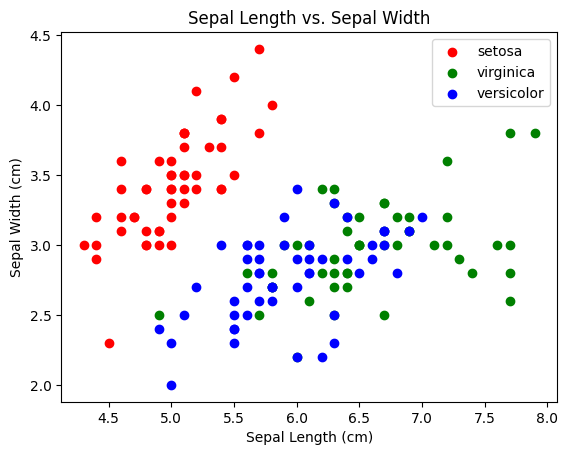

In [55]:
import matplotlib.pyplot as plt

# Get the unique target values and corresponding colors
targets = merged_df['target'].unique()
colors = ['r', 'g', 'b']

# Create a scatter plot for each target value
for target, color in zip(targets, colors):
    subset = merged_df[merged_df['target'] == target]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], c=color, label=iris.target_names[target])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width')
plt.legend()
plt.show()

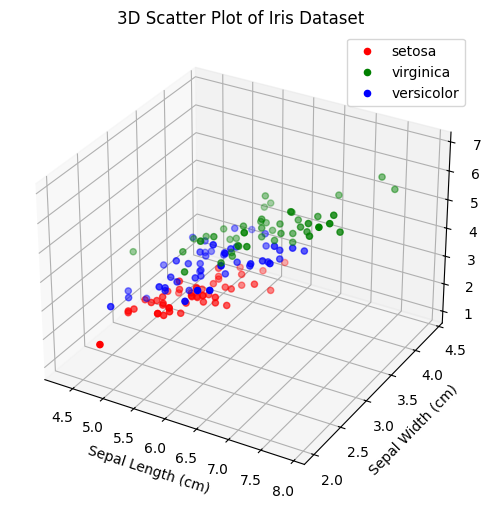

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Get the unique target values and corresponding colors
targets = merged_df['target'].unique()
colors = ['r', 'g', 'b']

# Create a scatter plot for each target value
for target, color in zip(targets, colors):
    subset = merged_df[merged_df['target'] == target]
    ax.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], subset['petal length (cm)'], c=color, label=iris.target_names[target])

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.legend()

plt.show()

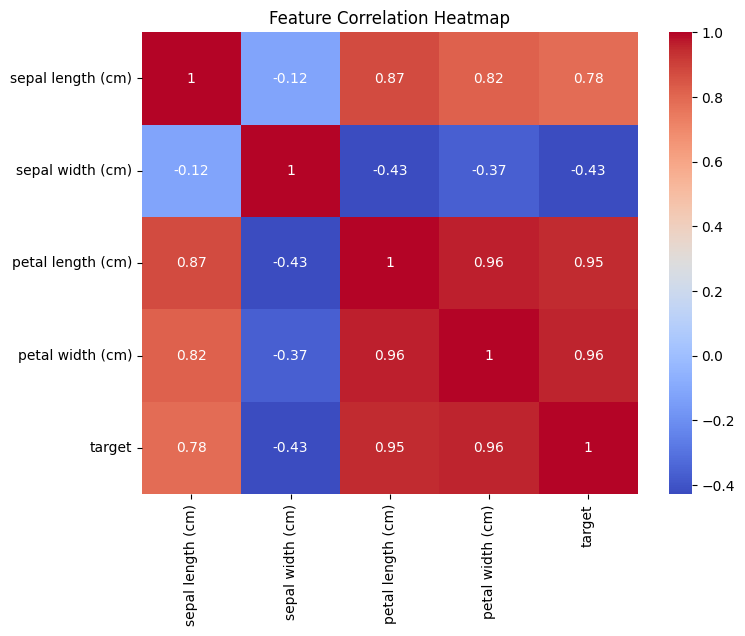

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix on numeric columns only
corr = merged_df.select_dtypes(include=np.number).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

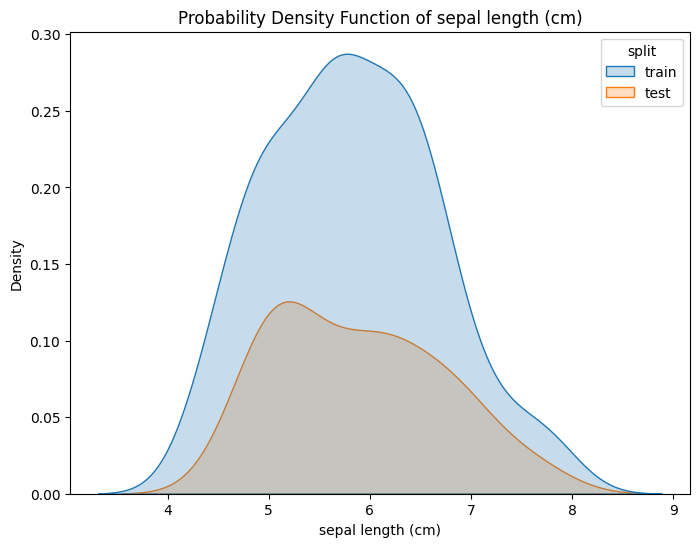

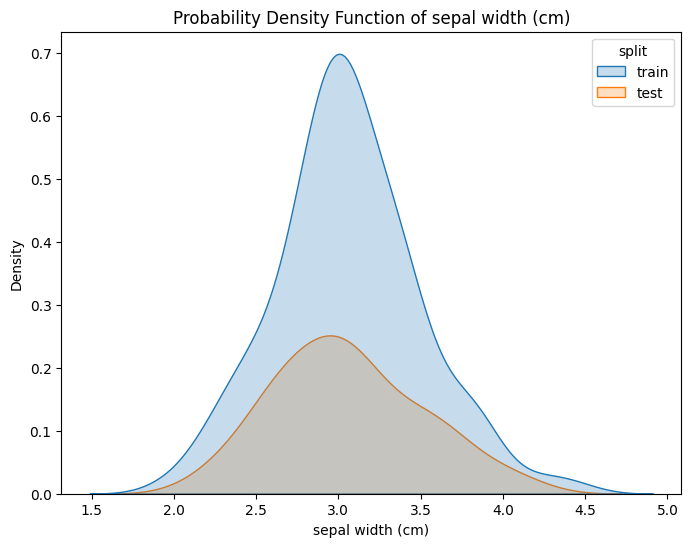

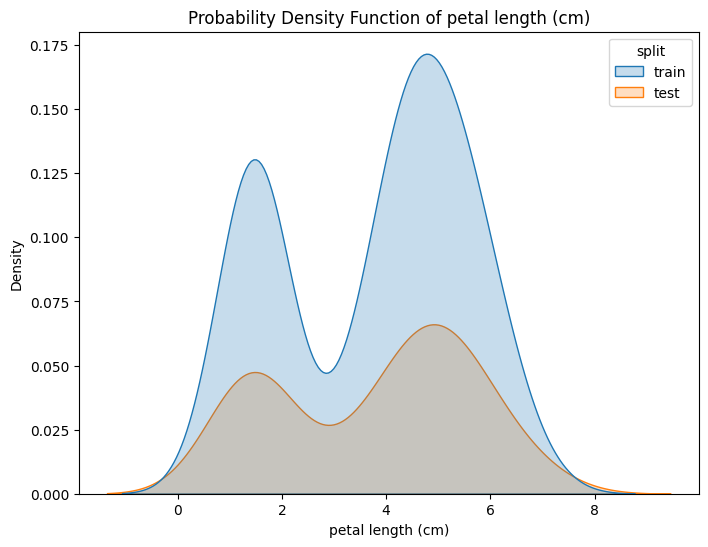

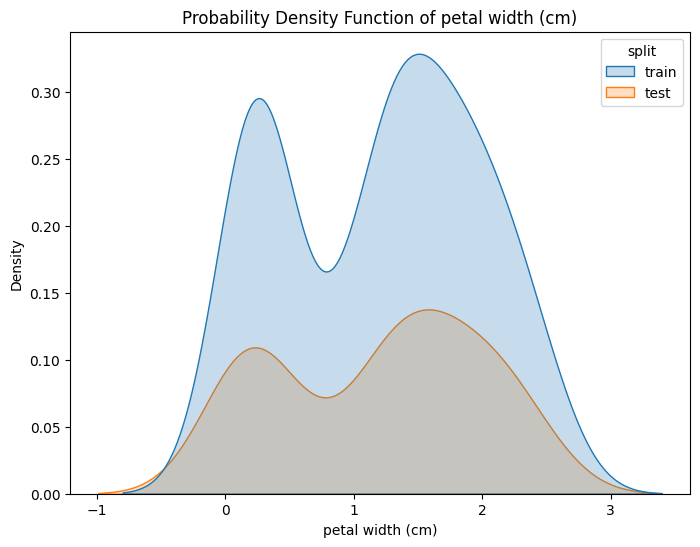

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature names
features = iris.feature_names

# Create a KDE plot for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=merged_df, x=feature, hue='split', fill=True)
    plt.title(f'Probability Density Function of {feature}')
    plt.show()

### C. Discretizing

In [59]:
# Discretize the 'sepal length (cm)' feature
merged_df['sepal_length_class'] = pd.cut(merged_df['sepal length (cm)'], bins=3, labels=['Short', 'Medium', 'Long'])

# Display the updated DataFrame with the new feature
display(merged_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,split,sepal_length_class
0,5.7,3.8,1.7,0.3,0,train,Medium
1,7.7,3.8,6.7,2.2,2,train,Long
2,5.7,3.0,4.2,1.2,1,train,Medium
3,5.8,2.8,5.1,2.4,2,train,Medium
4,5.6,2.5,3.9,1.1,1,train,Medium


### D. Statistical Analysis

In [60]:
# Filter the DataFrame for the 'setosa' class (target == 0)
setosa_df = merged_df[merged_df['target'] == 0]

# Display the statistical summary for the 'setosa' class
display(setosa_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0
